# リアルデータの変換

In [13]:
import sys
sys.path.append("..")

import torch
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

from glob import glob
from model import Generator
from utils.test_utils import img_transform, tensor_to_graph, net_info

from reserch_utils_HT import network_to_image, degree_hist

In [51]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# config
image_size = 100
c_dim = 4
g_repeat_num = 6
g_conv_dim = 64

for file_name in sorted(glob("../logs/*"))[:2]:
    for epoch in [100000]:
        print(file_name, epoch)
        # set generator
        model = Generator(g_conv_dim, c_dim, g_repeat_num).to(device)
        model_path = f"{file_name}/model/{epoch}-G.ckpt"
        model.load_state_dict(torch.load(model_path))
        break

../logs/poisson 100000
../logs/poisson_edge0.5 100000


In [36]:
epoch

100000

In [6]:
dataset_name = "COLLAB"
paths = glob(f"../data/TUDataset/{dataset_name}/100_graph/*.adjlist")

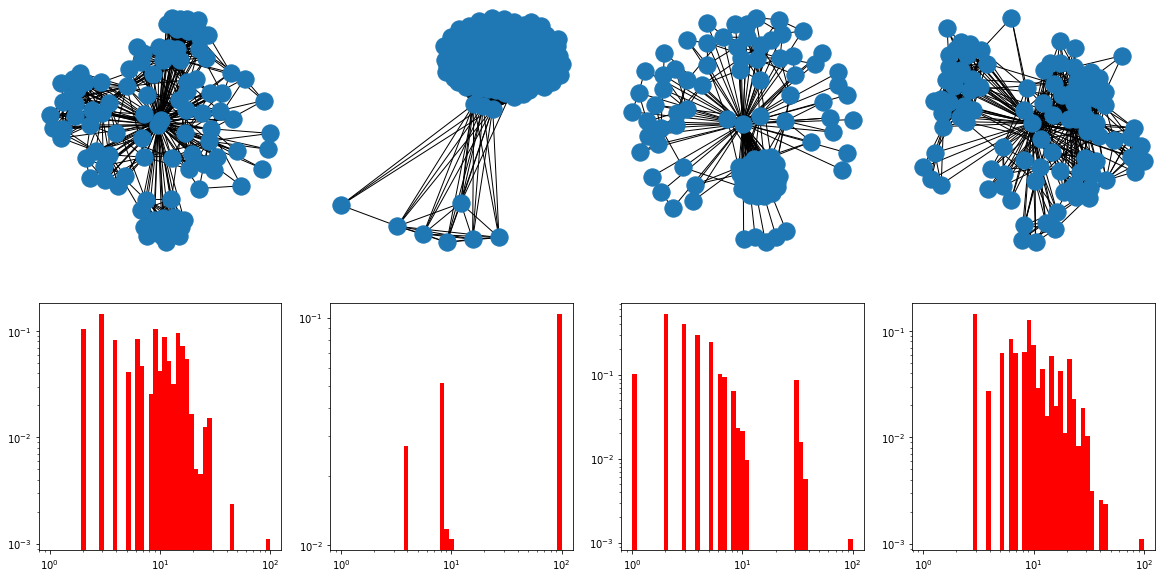

In [99]:
fig, axes = plt.subplots(2,4,figsize=(20,10))

indexs = np.random.choice(range(len(paths)), size=4, replace=False)

for i in range(4):
    G = nx.read_adjlist(paths[indexs[i]])
    nx.draw(G, ax=axes[0,i])
    degree_hist(G, ax=axes[1,i], log=True)    

In [57]:
def transform(img, model, model_label, device):
    """ image """
    # 画像前処理用
    transform = transforms.Compose(
        [
            transforms.Resize(100),
            transforms.Grayscale(),
            transforms.ToTensor(),
        ]
    )
    # generate fake tensor
    fake_tensor = img_transform(model, img, transform, device)
    return fake_tensor

def thres_tensor(tensor, thres):
    A = (tensor + tensor.T).numpy()
    A = (A > thres).astype(int)
    return A

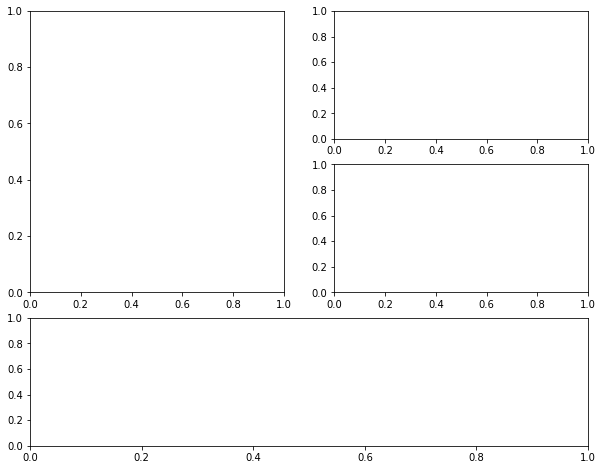

In [77]:
# 画像全体のサイズを指定（縦, 横）。
figure = plt.figure(figsize=(10, 8))

# 全体のGridSpec。必要なプロットの行数と列数、各行のサイズの比率を指定します。
# 今回はプロットの行の数が3、列の数が2で、各行の比率は同じ（[1, 1, 1]）とします。
# もし最後のプロット4だけ縦に大きくしたいといった場合には、[1, 1, 2]などと指定すると
# プロット4が2倍の高さになります。
gs_master = GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 1])

# プロット1部分。個別のプロットはGridSpecFromSubplotSpecクラスを使用します。
# このプロットで占有する行数と列数、GridSpec内でどこに該当するプロットなのか
# を指定します。縦2つ分、横1つ分となるので、nrows=2、ncols=2と指定しています。
# また、プロット内の0と1のインデックスの行領域と0のインデックスの列（左側）の
# 領域を指定するため、subplot_specにGridSpecの[0:2, 0]の位置を指定しています。
gs_1 = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_master[0:2, 0])
# GridSpecFromSubplotSpecの中で、さらにどの領域を使用してプロットをするかを
# add_subplot関数の引数に指定してプロットを追加します。今回は、プロット1の領域
# には1つのプロットしか配置しないので、すべての領域を指定するため行と列の
# インデックスにコロンを指定しています。
axes_1 = figure.add_subplot(gs_1[:, :])

# プロット2とプロット3部分。プロット1の領域と比べて、2分割して配置するので一緒の
# GridSpecFromSubplotSpecを参照します。必要な行数（nrows）と列数（ncols）はプロット1
# と変わりありません。インデックス0と1の行領域と右側の列（インデックス1）を指定
# するため、subplot_specに[0:2, 1]と指定しています。
gs_2_and_3 = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_master[0:2, 1])
# プロット2を追加します。GridSpecFromSubplotSpec内の最初の行（インデックス0）、
# 列は領域を全て使うのでコロンを指定しています。
axes_2 = figure.add_subplot(gs_2_and_3[0, :])
# 同様にプロット3。プロット2の次のインデックスの行を指定するため、[1, :]と指定
# しています。
axes_3 = figure.add_subplot(gs_2_and_3[1, :])

# プロット4部分。必要な行数が1（nrows=1）、列は左側と右側両方占めるため列数2
# （ncols=2）、subplot_specには3番目の行（インデックス2）とすべての列を指定
# するため[2, :]と指定しています。
gs_4 = GridSpecFromSubplotSpec(nrows=1, ncols=2, subplot_spec=gs_master[2, :])
# プロット1同様、この領域にはプロットが一つだけなので、GridSpecFromSubplotSpec
# のすべてのインデックスをコロンで指定しています。
axes_4 = figure.add_subplot(gs_4[:, :])

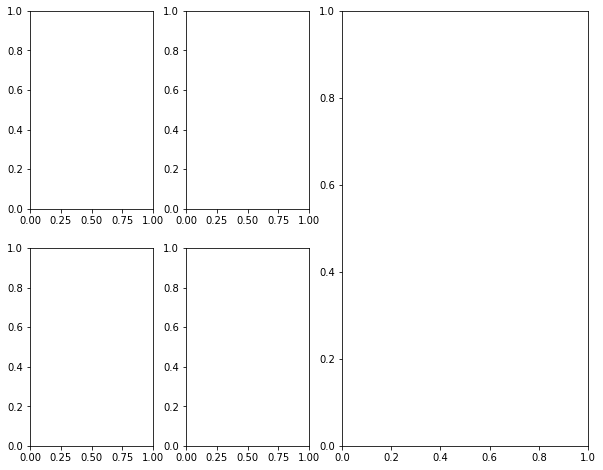

In [82]:
# 画像全体のサイズを指定（縦, 横）。
figure = plt.figure(figsize=(10, 8))
# 全体のGridSpec。必要なプロットの行数と列数、各行のサイズの比率を指定します。
# 今回はプロットの行の数が3、列の数が2で、各行の比率は同じ（[1, 1, 1]）とします。
# もし最後のプロット4だけ縦に大きくしたいといった場合には、[1, 1, 2]などと指定すると
# プロット4が2倍の高さになります。
gs_master = GridSpec(nrows=2, ncols=3, height_ratios=[1, 1], width_ratios=[1,1,2])

for r in range(2):
    for c in range(2):
        gs = GridSpecFromSubplotSpec(nrows=1, ncols=1, subplot_spec=gs_master[r, c])
        axes = figure.add_subplot(gs[0, 0])

gs_2 = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_master[0:2, 2])
axes_2 = figure.add_subplot(gs_2[:, :])

In [90]:
fake_G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99))

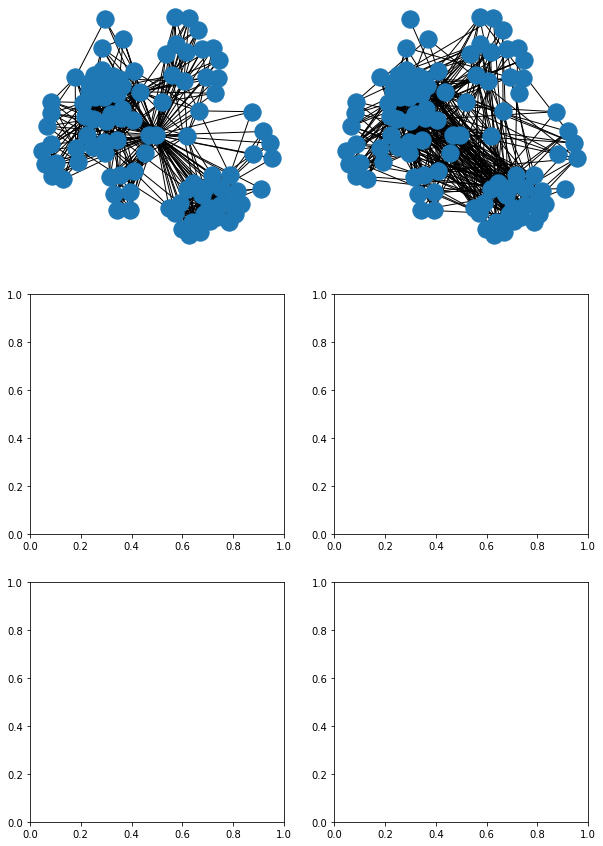

In [101]:
# value(次数)で並び替え
fig, axes = plt.subplots(3,2,figsize=(10,15))

mapping = {n:i for i,n in enumerate(list(G.nodes()))}
G = nx.relabel_nodes(G, mapping)
# network
pos = nx.spring_layout(G, .2)
###
degs = dict(G.degree())
sort_degs = sorted(degs.items(), key=lambda x: x[1])
sort_nodes = [node[0] for node in sort_degs]
###
img = network_to_image(G,sort=True)
fake_tensor = graph_to_model(G, model, 0, device)
###
fake_G = tensor_to_graph(fake_tensor[0][0], 1.0)

nx.draw(G, pos, ax=axes[0,0])
fake_pos = {i:pos[num] for i,num in enumerate(sort_nodes)}
nx.draw(fake_G, fake_pos, ax=axes[0,1])


In [ ]:
def change_plot(G):
    fig, axes = plt.subplots(3,2,figsize=(10,15))
    # network
    pos = nx.spring_layout(G. .2)
    
    # adjacency matrix
    
    # degree distribution

In [55]:
mapping = {n:i for i,n in enumerate(list(G.nodes()))}
G = nx.relabel_nodes(G, mapping)

img = network_to_image(G,sort=True)
fake_tensor = graph_to_model(G, model, 0, device)

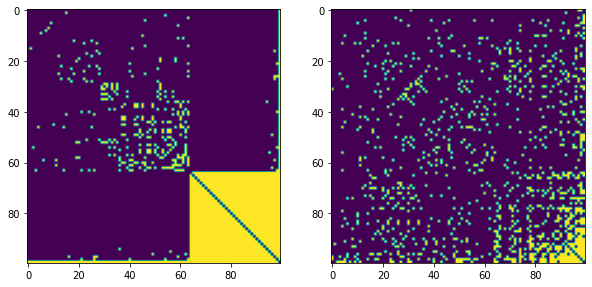

In [56]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(np.array(img))
axes[1].imshow(thres_tensor(fake_tensor[0][0], 1))